In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
%matplotlib inline

import gensim
import gensim.corpora as corpora
import plotly


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
!pip install plotly==5.4.0

  Using cached plotly-5.4.0-py2.py3-none-any.whl (25.3 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 4.14.2
    Uninstalling plotly-4.14.2:
      Successfully uninstalled plotly-4.14.2


# **Create dataframe for each individual json file**

In [4]:
amzn = pd.read_json('Amazon-Brand-Food-Chicken-Brown2021-12-16 07_13_59Z.json')
bb_adult = pd.read_json('Blue-Buffalo-Protection-Formula-Adult2021-12-16 06_50_00Z.json')
bb_small = pd.read_json('Blue-Buffalo-Protection-Formula-Small2021-12-16 07_43_51Z.json')
bb_wild = pd.read_json('Blue-Buffalo-Wilderness-Protein-Natural2021-12-16 07_40_29Z.json')
canine = pd.read_json('CANINE-CUISINE-Poultry-Variety-3-5-oz2021-12-16 07_19_58Z.json')
ceasar = pd.read_json('CESAR-DELIGHTS-Classic-Sauce-Variety2021-12-16 08_04_06Z.json')
hills = pd.read_json('HillS-Science-Diet-Adult-Recipe2021-12-16 07_37_45Z.json')
iams = pd.read_json('Iams-Proactive-Health-Minichunks-Chicken2021-12-16 08_10_15Z.json')
nb = pd.read_json('Natural-Balance-Limited-Ingredient-Formula2021-12-16 08_11_35Z.json')
nr = pd.read_json('NatureS-Recipe-Grain-Free-Food2021-12-16 07_50_13Z.json')
ped_v = pd.read_json('PEDIGREE-Variety-Hickory-Chicken-Vegetables2021-12-16 07_54_13Z.json')
ped_c = pd.read_json('Pedigree-Complete-Nutrition-Grilled-Vegetable2021-12-16 07_01_33Z.json')
ped_c2 = pd.read_json('Pedigree-Complete-Nutrition-Grilled-Vegetable2021-12-16 07_58_03Z.json')
ped_c3 = pd.read_json('Pedigree-Complete-Nutrition-Roasted-Vegetable2021-12-16 06_53_04Z.json')
purina_b = pd.read_json('Purina-Beneful-Variety-IncrediBites-Chicken2021-12-16 07_23_09Z.json')
purina_p = pd.read_json('Purina-Pro-Plan-Shredded-Chicken2021-12-16 08_01_45Z.json')
purina_s = pd.read_json('Purina-Smartblend-Natural-Chicken-Formula2021-12-16 06_57_23Z.json')
rr = pd.read_json('Rachael-Ray-Nutrish-Natural-Recipe2021-12-16 07_33_35Z.json')
rr_v = pd.read_json('Rachael-Ray-Nutrish-Variety-Ounce2021-12-16 07_46_54Z.json')
sch = pd.read_json('Science-Diet-Chicken-Barley-Recipe2021-12-16 08_13_02Z.json')
ss = pd.read_json('Science-Diet-Sensitive-Stomach-Chicken2021-12-16 07_30_01Z.json')
taste = pd.read_json('Taste-Wild-Protein-Prairie-Premium2021-12-16 07_28_14Z.json')

# **Concatinate all dataframes into one df**

In [5]:
frames = [amzn, bb_adult, bb_small, bb_wild, canine, ceasar, hills, iams, nb, nr, ped_v, ped_c, ped_c2, ped_c3, purina_b, purina_p, purina_s, rr, rr_v, sch, ss, taste]
df = pd.concat(frames)

In [6]:
df['subject'].value_counts().count()

22

# **Create a column with calculating the total words**

In [7]:
df['total_words'] = df['body'].str.split().str.len()

# **Create a column calculating the total characters excluding the space**

In [8]:
df['total_chars'] = df['body'].map(lambda calc: (len(calc) - calc.count(" ")))

# **Create a column eliminating the stopwords in body part**

In [9]:
#created a column with stopwords eliminated body
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_removed_body'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Get the top common words**


In [10]:
#20 most common words
top_words = Counter(" ".join(df['stopwords_removed_body']).split()).most_common(50)

In [11]:
top_words_df = pd.DataFrame(top_words)

In [12]:
import plotly.express as px
fig = px.bar(top_words_df, x=0, y=1)
fig.update_layout(title = "Top 50 words occurences",
     xaxis_title = 'Words', yaxis_title = 'Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# **WorldCloud**

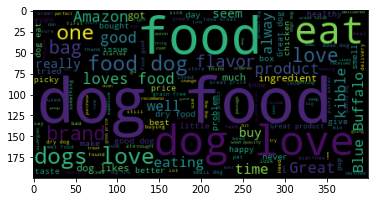

In [13]:
#generate a simple wordcloud for top words 
wordcloud = WordCloud().generate(' '.join(df['stopwords_removed_body']))
plt.imshow(wordcloud)

(-0.5, 2999.5, 1999.5, -0.5)

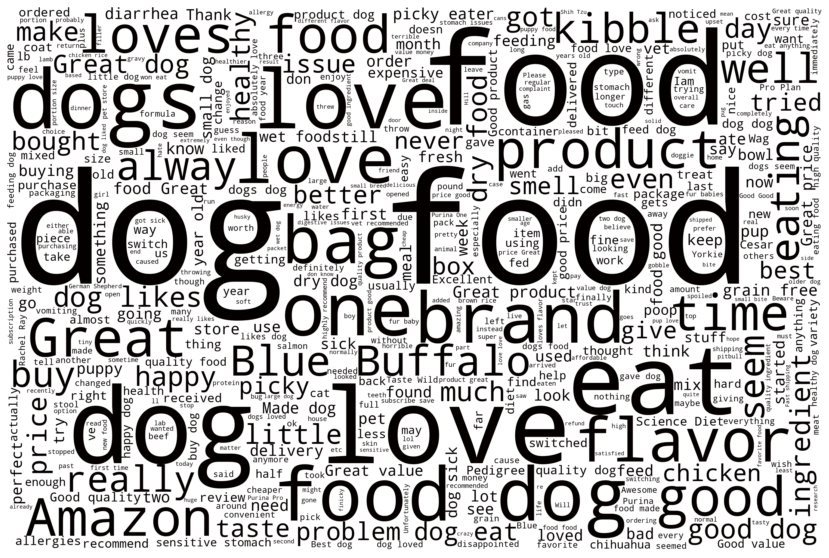

In [14]:
#generate a wordcloud that encapsulates more from the column
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(' '.join(df['stopwords_removed_body']))

wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# save the image
# plt.savefig('biden_wc.png')

In [15]:
df.to_csv("emerged_data.csv")

# **Topic Modeling with BERTopic**

First, install the bertopic. 
Second, restart and run all by commenting these following two cells.

In [16]:
# %%capture
# !pip install bertopic

In [17]:
# pip install bertopic==0.9.4

In [18]:
all_text = df['stopwords_removed_body'].to_list()

In [19]:
all_text

['Dog Vomit Like others, dog food doesn’t settle well dog, vomiting immediately consumption. Would recommend.',
 'A good alternative Merrick Usually, feed Merrick’s Salmon Brown Rice formula, availability Amazon well vendors limited recently. So, thought we’d give WAG version same: Salmon Brown Rice. My dog didn’t seem mind switch all, shown adverse reactions—with exception seems get slight tear burns. Nothing major, ingredients seem similar Merrick’s, must minor difference. Still, viable alternative.',
 'My dogs love food Our regular dog food delivery delayed Chewy. I needed something quick I thought I’d try one girls. They loved it.Great value!',
 'One dogs allergic One 2 dogs started itching like crazy started feed this. When went back previous brand dog food itching stopped. Obviously allergic something dog food.',
 'Awesome product Dogs really like formula',
 'My dog likes My dog likes eats it. Seems well made good quality price',
 'Great Great value.',
 'Poor Quality My dog got h

Training our model.

In [21]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(all_text)

/usr/local/lib/python3.7/dist-packages/numba/core/types/__init__.py:108: DeprecationWarning:

`np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/types/__init__.py:109: DeprecationWarning:

`np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can us

Batches:   0%|          | 0/370 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this

After fitting our model, we can start by looking at the results. We look at the most frequent topics first as they best represent the collection of documents.

In [22]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,4021,-1_food_dog_dogs_eat
1,0,592,0_delivery_product_price_great
2,1,353,1_flavor_taste_flavors_cant
3,2,303,2_price_value_good_great
4,3,290,3_sick_diarrhea_made_vomiting
5,4,287,4_box_open_bag_ripped
6,5,278,5_picky_eater_eaters_eat
7,6,271,6_allergies_skin_allergic_allergy
8,7,267,7_blue_buffalo_started_we
9,8,215,8_it_love_woof_loves


-1 refers to all outliers and can be ignored.

Frequent generated topics.

In [23]:
topic_model.get_topic(0)

[('delivery', 0.04711378071250641),
 ('product', 0.0428145133306777),
 ('price', 0.0423285537811037),
 ('great', 0.03574977042885282),
 ('value', 0.034982519395498034),
 ('fast', 0.031998340510919675),
 ('good', 0.02678393304976489),
 ('shipping', 0.024610010449012544),
 ('delivered', 0.022523773830476185),
 ('thank', 0.01854171418894882)]

Visualize the Topics.

In [24]:
topic_model.visualize_distribution(probs[200], min_probability=0.010)

In [25]:
topic_model.visualize_hierarchy(top_n_topics=100)

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores.

In [26]:
topic_model.visualize_term_rank()

In [27]:
similar_topics, similarity = topic_model.find_topics("dog", top_n=5); similar_topics

[24, -1, 62, 16, 106]

In [28]:
topic_model.get_topic(26)

[('salmon', 0.05439450061016243),
 ('wag', 0.0429020793325479),
 ('brown', 0.028799040215419014),
 ('rice', 0.025556561023799364),
 ('chicken', 0.022201626118336218),
 ('kibble', 0.01880356083813527),
 ('ingredients', 0.014432044472741809),
 ('ingredient', 0.012622626718373449),
 ('grains', 0.011482294883814444),
 ('tomatoes', 0.010672409160683896)]

We can create a similarity matrix by applying cosine similarities through topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [29]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:349: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

